## IMPORTING LIBRARYS

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from xgboost import XGBClassifier
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os

c:\Users\Leonardo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## SETTING PARAMETERS

In [2]:
percentege_test_size = 0.2
undersampling_size = -1 # -1 to not ahve undersampling

directory='./data/anime_characters' 
#directory='./data/animals' 

In [3]:
directory

'./data/anime_characters'

### LOADING DATASET

In [4]:
targets = [x[0].replace(directory,'') for x in os.walk(directory)]

targets = targets[1:len(targets)] # removes the first one from the list cuz its itself

dados = []
word='\ ' 
word=word.rstrip()
for classe in targets:
    imagens = os.listdir(directory+classe)
    i = 0
    for img in imagens:
        i+=1
        
        if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
            dados.append([directory+classe+'/'+img,classe.replace(word,'')])
        
        if(i == undersampling_size and undersampling_size != -1):
            break

dados = np.array(dados)
np.random.shuffle(dados)
            
df_dados = pd.DataFrame(dados,columns=['image','target'])

df_dados

,image,target
0,./data/anime_characters\killua/Killua89.jpg,killua
1,./data/anime_characters\luffy/Luffy34.jpg,luffy
2,./data/anime_characters\luffy/Luffy17.jpg,luffy
3,./data/anime_characters\naruto/Naruto60.jpg,naruto
4,./data/anime_characters\light yagami/Light Yag...,light yagami
...,...,...
695,./data/anime_characters\luffy/Luffy22.jpg,luffy
696,./data/anime_characters\luffy/Luffy75.jpg,luffy
697,./data/anime_characters\goku/Goku58.jpg,goku
698,./data/anime_characters\gon/Gon82.jpg,gon


## PREPARING DATA

In [5]:
def getEmbedder():
    # return EfficientNetB0(weights='imagenet', include_top=False)
    # return EfficientNetB2(weights='imagenet', include_top=False)
    # return EfficientNetB3(weights='imagenet', include_top=False)
    # return EfficientNetB4(weights='imagenet', include_top=False)
    return EfficientNetB7(weights='imagenet', include_top=False)
    #return InceptionV3(weights='imagenet', include_top=False)

def embedding(embedder,img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    embed = image.img_to_array(img)
    embed = np.expand_dims(embed, axis=0)
    # embed = preprocess_input(embed)

    features = embedder.predict(embed)

    return features[0][0][0]

embedder = getEmbedder()

In [6]:
# embedding(embedder,dados[0][0])

In [7]:
target = df_dados['target'].array

array_features = []
for x in dados:
    array_features.append(embedding(embedder,x[0]))

scaler = preprocessing.StandardScaler()

array_features = scaler.fit_transform(array_features)

df_features = pd.DataFrame(array_features)

df_features

1/1 [==============================] - 0s 40ms/step


,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-0.456009,-0.479628,0.574742,0.194718,-0.407494,-0.638755,-0.513100,-0.495266,-0.683587,0.068985,...,1.975555,-0.071870,-0.018748,0.160700,1.667321,0.145125,0.166599,-0.559409,3.023055,-0.516447
1,-0.330411,-0.516675,-0.462813,-0.141262,-0.420053,1.397122,1.667326,-0.027334,0.816534,-0.127895,...,-0.194340,0.136579,0.239855,-0.099743,0.609004,-0.374859,-0.592882,-0.603442,0.313021,0.431369
2,-0.630107,-0.503573,-0.499077,-0.259999,-0.517482,-0.588415,0.011003,-0.177111,-0.720807,-0.100005,...,-0.632639,-0.412372,-0.352507,-0.666042,-0.297055,-0.597350,-0.543759,-0.305073,-0.304409,-0.501501
3,-0.384334,-0.147728,-0.559706,-0.549573,-0.456109,-0.587385,-0.585585,-0.423760,-0.618908,0.413783,...,-0.513849,-0.474289,-0.408321,-0.156811,0.803347,-0.445120,-0.587486,-0.637514,-0.539115,-0.308105
4,0.929450,2.277369,-0.541406,-0.040082,-0.541769,-0.539884,1.207408,-0.166499,-0.500867,-0.561950,...,-0.642844,-0.461166,-0.022048,-0.552685,-0.469359,-0.751104,-0.596731,0.163037,-0.450891,1.042119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.019961,-0.286180,-0.553485,-0.710785,-0.472848,-0.654942,-0.564917,-0.477255,0.184828,-0.524605,...,-0.516219,-0.220010,-0.075244,-0.071537,0.873948,-0.436202,-0.536786,2.210501,-0.385336,-0.299543
696,0.045459,-0.405537,-0.095395,-0.587726,-0.486346,0.549428,0.032493,-0.536933,1.222651,-0.320813,...,-0.360865,0.079921,-0.111838,-0.483509,-0.008973,0.085202,-0.551432,0.660475,-0.298125,-0.101555
697,1.140053,-0.504945,1.300858,-0.196942,0.084858,0.466234,0.427164,-0.515757,1.404199,-0.362195,...,-0.021075,0.613106,-0.403243,-0.677361,-0.313813,-0.667055,-0.324980,0.840461,0.166316,-0.515620
698,-0.549832,0.602902,-0.290569,-0.086654,-0.114681,-0.243433,-0.757170,-0.339082,-0.560068,0.102559,...,-0.597682,-0.451129,-0.028799,2.885632,1.878657,0.592324,-0.576501,0.366775,0.040345,-0.177213


## REDUCING DIMENSIONALITY

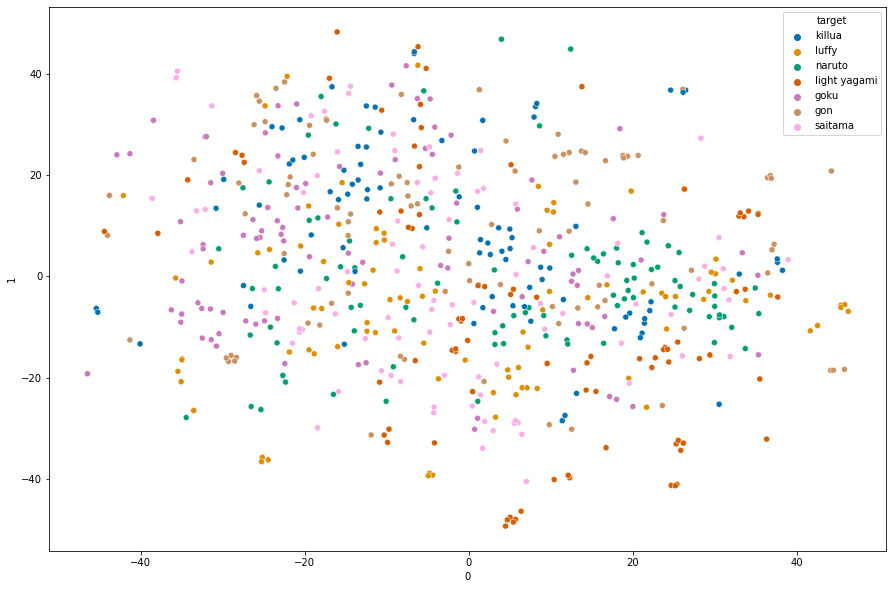

In [8]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15)
array_red = model.fit_transform(df_features) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = target

plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="colorblind")

plt.show()

## TRAINING AND VALIDATING MODEL

In [60]:
def getModel():
    #return RandomForestClassifier(n_jobs=6)
    return LogisticRegression(n_jobs=6, solver='sag', multi_class='ovr')
    # return KNeighborsClassifier(n_neighbors=3,n_jobs=6)
    #return XGBClassifier()
    #return SGDClassifier(n_jobs=20,early_stopping=True,validation_fraction=0.05)

In [61]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_features.values,target,test_size=percentege_test_size)

model = getModel().fit(X_treino, y_treino)

score = model.score(X_teste, y_teste)

score


c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7071428571428572

## CROSS VALIDATING

In [62]:
scores = cross_val_score(getModel(),df_features.values,target,cv=10)

np.mean(scores)

0.6685714285714286

## DISPLAYING CONFUSION MATRIX

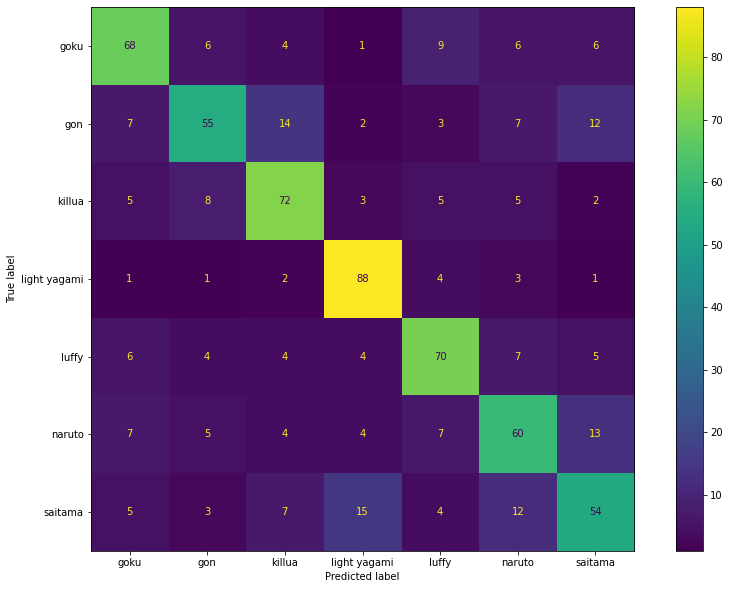

In [63]:
predicoes = cross_val_predict(getModel(),df_features.values,target,cv=10)

cm = confusion_matrix(target, predicoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()